In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Add the following code that we used to generate the random latitudes. Also, we'll create a similar code snippet 
# that will generate longitudes. To ensure enough latitudes and longitudes, we'll start with 1,500. 
# In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) 
# with the zip() function.

# When we run this cell, the output is a zip object in memory.

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Next, let's unpack our lat_lngs zip object into a list. This way, we only need to create a set of random 
# latitudes and longitudes once. In a new cell in the WeatherPy.ipynb file, add the following code and run the cell.

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# You can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.
# Now that we have our ordered pairs of latitudes and longitudes in a list, we can iterate through the list 
# of tuples and find the nearest city to those coordinates.

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [17]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [19]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 29 of Set 25 | mataura
Processing Record 30 of Set 25 | flin flon
Processing Record 31 of Set 25 | vaitape
Processing Record 32 of Set 25 | punta arenas
Processing Record 33 of Set 25 | vanavara
Processing Record 34 of Set 25 | cape town
Processing Record 35 of Set 25 | belushya guba
City not found. Skipping...
Processing Record 36 of Set 25 | albany
Processing Record 37 of Set 25 | cockburn town
Processing Record 38 of Set 25 | kampene
Processing Record 39 of Set 25 | isiro
Processing Record 40 of Set 25 | ilulissat
Processing Record 41 of Set 25 | kapaa
Processing Record 42 of Set 25 | puerto ayora
Processing Record 43 of Set 25 | yithion
City not found. Skipping...
Processing Record 44 of Set 25 | vaini
Processing Record 45 of Set 25 | sulangan
Processing Record 46 of Set 25 | rikitea
Processing Record 47 of Set 25 | new norfolk
Processing Record 48 of Set 25 | yala
Processing Record 49 of Set 25 | baruun-urt
Processing Record 50 of Set 25 | yulara
Processing Recor

Processing Record 37 of Set 28 | udachnyy
Processing Record 38 of Set 28 | nishihara
Processing Record 39 of Set 28 | camocim
Processing Record 40 of Set 28 | high level
Processing Record 41 of Set 28 | signagi
City not found. Skipping...
Processing Record 42 of Set 28 | sao felix do xingu
Processing Record 43 of Set 28 | hunza
City not found. Skipping...
Processing Record 44 of Set 28 | isangel
Processing Record 45 of Set 28 | avarua
Processing Record 46 of Set 28 | saint anthony
Processing Record 47 of Set 28 | x-can
City not found. Skipping...
Processing Record 48 of Set 28 | yumen
Processing Record 49 of Set 28 | buin
Processing Record 50 of Set 28 | raudeberg
Processing Record 1 of Set 29 | antofagasta
Processing Record 2 of Set 29 | buala
Processing Record 3 of Set 29 | la paz
Processing Record 4 of Set 29 | alihe
Processing Record 5 of Set 29 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 29 | geraldton
Processing Record 7 of Set 29 | chateauroux
Processing

Processing Record 17 of Set 32 | bonavista
Processing Record 18 of Set 32 | hurst
Processing Record 19 of Set 32 | maine-soroa
Processing Record 20 of Set 32 | adre
Processing Record 21 of Set 32 | tuatapere
Processing Record 22 of Set 32 | novoagansk
Processing Record 23 of Set 32 | dukat
Processing Record 24 of Set 32 | northam
Processing Record 25 of Set 32 | lavrentiya
Processing Record 26 of Set 32 | straumen
Processing Record 27 of Set 32 | pasni
Processing Record 28 of Set 32 | zhigansk
Processing Record 29 of Set 32 | kysyl-syr
Processing Record 30 of Set 32 | port lincoln
Processing Record 31 of Set 32 | umea
Processing Record 32 of Set 32 | tumaco
Processing Record 33 of Set 32 | fairbanks
Processing Record 34 of Set 32 | totoral
Processing Record 35 of Set 32 | sur
Processing Record 36 of Set 32 | hobe sound
Processing Record 37 of Set 32 | kieta
Processing Record 38 of Set 32 | rawah
Processing Record 39 of Set 32 | snyder
Processing Record 40 of Set 32 | andenes
Processing

Processing Record 50 of Set 35 | sabzevar
Processing Record 1 of Set 36 | high prairie
Processing Record 2 of Set 36 | ulladulla
Processing Record 3 of Set 36 | anahuac
Processing Record 4 of Set 36 | channel-port aux basques
Processing Record 5 of Set 36 | alfatar
Processing Record 6 of Set 36 | oda
Processing Record 7 of Set 36 | chapais
Processing Record 8 of Set 36 | cabedelo
Processing Record 9 of Set 36 | salalah
Processing Record 10 of Set 36 | yelizovo
Processing Record 11 of Set 36 | bani
Processing Record 12 of Set 36 | estelle
Processing Record 13 of Set 36 | yar-sale
Processing Record 14 of Set 36 | pangody
Processing Record 15 of Set 36 | quelimane
Processing Record 16 of Set 36 | osakarovka
Processing Record 17 of Set 36 | cap malheureux
Processing Record 18 of Set 36 | lukiv
Processing Record 19 of Set 36 | nikolayevskaya
Processing Record 20 of Set 36 | bardiyah
Processing Record 21 of Set 36 | halalo
City not found. Skipping...
Processing Record 22 of Set 36 | nuevitas

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,52.48,99,93,1.21,NZ,2021-10-08 06:44:56
1,Flin Flon,54.7682,-101.8650,40.46,50,40,2.51,CA,2021-10-08 06:44:56
2,Vaitape,-16.5167,-151.7500,78.57,72,5,6.26,PF,2021-10-08 06:44:57
3,Punta Arenas,-53.1500,-70.9167,46.51,53,0,8.05,CL,2021-10-08 06:44:57
4,Vanavara,60.3400,102.2797,37.62,81,100,8.99,RU,2021-10-08 06:44:58
5,Cape Town,-33.9258,18.4232,63.09,55,75,19.57,ZA,2021-10-08 06:44:58
6,Albany,42.6001,-73.9662,57.31,95,2,1.61,US,2021-10-08 06:41:07
7,Cockburn Town,21.4612,-71.1419,82.29,75,6,14.94,TC,2021-10-08 06:44:30
8,Kampene,-3.6000,26.6667,83.28,58,10,2.66,CD,2021-10-08 06:44:59
9,Isiro,2.7739,27.6160,76.73,70,100,3.83,CD,2021-10-08 06:45:00


In [21]:
# reorder columns in the dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-10-08 06:44:56,-46.1927,168.8643,52.48,99,93,1.21
1,Flin Flon,CA,2021-10-08 06:44:56,54.7682,-101.8650,40.46,50,40,2.51
2,Vaitape,PF,2021-10-08 06:44:57,-16.5167,-151.7500,78.57,72,5,6.26
3,Punta Arenas,CL,2021-10-08 06:44:57,-53.1500,-70.9167,46.51,53,0,8.05
4,Vanavara,RU,2021-10-08 06:44:58,60.3400,102.2797,37.62,81,100,8.99
5,Cape Town,ZA,2021-10-08 06:44:58,-33.9258,18.4232,63.09,55,75,19.57
6,Albany,US,2021-10-08 06:41:07,42.6001,-73.9662,57.31,95,2,1.61
7,Cockburn Town,TC,2021-10-08 06:44:30,21.4612,-71.1419,82.29,75,6,14.94
8,Kampene,CD,2021-10-08 06:44:59,-3.6000,26.6667,83.28,58,10,2.66
9,Isiro,CD,2021-10-08 06:45:00,2.7739,27.6160,76.73,70,100,3.83


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

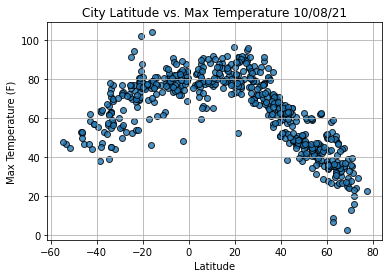

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

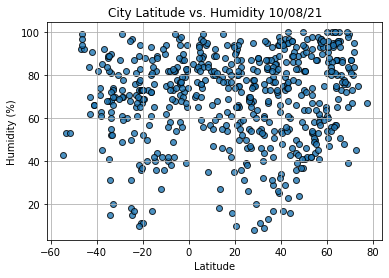

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

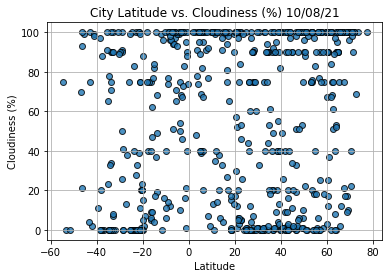

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

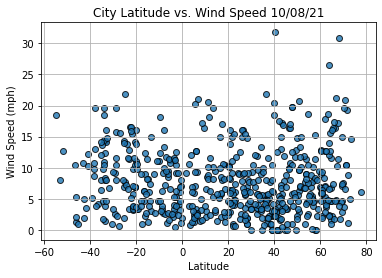

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()